# Wine Quality by UCI
# Качество вина от UCI

https://www.kaggle.com/huseyinelci/wne-qualty-by-uci?select=WineQuality-WhiteWine.csv

Два разных набора данных относятся к вариантам красного и белого вина португальского вина "Винью Верде". Из-за проблем с конфиденциальностью доступны только физико-химические (исходные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, цене продажи вина и т.д.)

Классы упорядочены и не сбалансированы (например, нормальных вин гораздо больше, чем отличных или плохих).

#### Количество экземпляров:

 - Красное вино: 1599
 - Белое вино: 4898
 
#### Количество признаков:

Входные переменные (на основе физико-химических тестов):

1. fixed acidity (фиксированная кислотность)
2. volatile acidity (летучая кислотность)
3. citric acid (лимонная кислота)
4. residual sugar (остаточный сахар)
5. chlorides (хлориды)
6. free sulfur dioxide (свободный диоксид серы)
7. total sulfur dioxide (общий диоксид серы)
8. density (плотность)
9. pH (мера кислотность)
10. sulphates (сульфаты)
11. alcohol (спирт)

Выходная переменная (на основе сенсорных данных):

12. quality (качество): score between 0 and 10

#### Описание признаков

Названия признаков                          | Описания признаков          
--------------------------------------------|--------------------------------------------------------
fixed acidity (фиксированная кислотность)   |Этот столбец содержит большинство кислот, связанных с вином, фиксированных или нелетучих
volatile acidity (летучая кислотность)      |Слишком высокое количество уксусной кислоты в вине в этой колонке может привести к неприятным последствиям. Это значит, что вино обладает сильным уксусным вкусом.
citric acid (лимонная кислота)              |В небольших количествах лимонная кислота может добавить винам «свежесть» и «аромат».
residual sugar (остаточный сахар)           |Количество сахара, оставшегося после прекращения брожения. Редко можно найти вина с концентрацией менее 1 грамма/литр. Вина с концентрацией более 45 г/л считаются сладкими.
chlorides (хлориды)                         |В этом столбце указано количество соли в вине.
free sulfur dioxide (свободный диоксид серы)|Свободная форма $SO_2$ находится в равновесии между молекулярным $SO_2$ (в виде растворенного газа) и бисульфит-ионом.
total sulfur dioxide (общий диоксид серы)   |Количество свободных и связанных форм $S0_2$. Это количество при низких концентрациях $SO_2$ в основном не обнаруживается в вине, но при концентрациях свободного $SO_2$ более 50 частей на миллион $SO_2$ проявляется в аромате запаха и вкусе вина.
density (плотность)                         |В этом столбце указана плотность. Плотность вина близка к плотности воды в зависимости от процента содержания сахара и алкоголя.
pH (мера кислотность)                       |В этом столбце указано количество кислоты или основного вина. Описывает кислотность или основность вина по шкале от 0 (очень кислая) до 14 (очень щелочная). Большинство вин имеют уровень pH от 3 до 4.
sulphates (сульфаты)                        |В этом столбце указано количество сульфатов, содержащихся в вине. Добавка для вина, которая может способствовать повышению уровня газообразного диоксида серы ($S0_2$), который действует как антимикробное и антиоксидантное средство.
alcohol (спирт)                             |В этом столбце указано процентное содержание алкоголя в вине.
quality (качество)                          |В этой колонке указано качество вина.


#### Описание задачи
Нам нужно оценить качество вина по шкале от 0 до 10 по входным признакам (физико-химические признаки и тип вина).


## Загружаем библиотеки

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Красивая графика для визуализации данных
import sklearn  

## Загружаем данные

In [2]:
data_raw_red = pd.read_csv("WineQualityRedWine.csv")
data_raw_white = pd.read_csv("WineQualityWhiteWine.csv")

Nr,dr=data_raw_red.shape    
Nw,dw=data_raw_white.shape
Nr,Nw

(1599, 4898)

In [3]:
data_raw_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data_raw_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Объединяем наши данные в одну таблицу

#### Добавим тип вина к нашим данным
Добавим столбец о типе вина к нашим данным.
Объединим данные о красном вине и о белом, чтобы получить категориальный признак в нашей таблице.
(У нас будут разнородные признаки).

In [5]:
clmn = np.full(Nr, 'red')
data_raw_red['Type']=clmn
data_raw_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [6]:
clmn = np.full(Nw, 'white')
data_raw_white['Type']=clmn
data_raw_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Объединим данные в одну таблицу

In [7]:
data_raw = pd.concat((data_raw_red, data_raw_white), axis=0)
data_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
data_raw = data_raw.reset_index(drop=True) # перенумеруем наши объекты
data_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
data_raw['Type'].dtype

dtype('O')

Изменим тип с object на категориальный

In [10]:
data_raw['Type'] = data_raw['Type'].astype('category')

In [11]:
data_raw['Type'].dtype

CategoricalDtype(categories=['red', 'white'], ordered=False)

In [12]:
data_raw['quality'].dtype

dtype('int64')

# Предобработка данных

## Визуализируем данные

### Зависимость качества от одного признака 
Визуализация данных нужна, чтобы как-то понять эти данные, увидеть какие-то закономерности, связи между объектами

#### Зависимость качества от фиксированной кислотности:

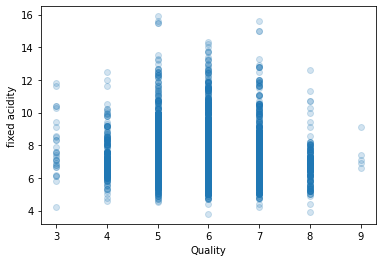

In [13]:
plt.scatter(data_raw['quality'], data_raw['fixed acidity'], alpha=0.2, )
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
pass

Можем заметить, что хорошее вино имеет кислотность ниже средней (6-8), вино среднего качества имеет любую кислотность.

#### Зависимость качества от плотности

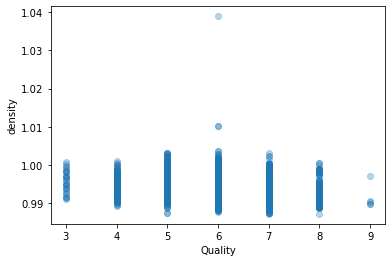

In [14]:
plt.scatter(data_raw['quality'], data_raw['density'], alpha=0.3)
plt.xlabel('Quality')
plt.ylabel('density')
pass

Заметим, что  в среднем вино имеет одинаковую плотность.
Можем увидеть одно значение, отличающееся от остальных. Возможно, это выброс. 

### Удаление выбросов

In [15]:
data_raw['fixed acidity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     4.948
0.010     5.100
0.050     5.700
0.100     6.000
0.500     7.000
0.900     8.800
0.950     9.800
0.990    12.000
0.995    12.700
Name: fixed acidity, dtype: float64

In [16]:
data_raw['density'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.988620
0.010    0.988920
0.050    0.989900
0.100    0.990670
0.500    0.994890
0.900    0.998400
0.950    0.999392
0.990    1.000600
0.995    1.001400
Name: density, dtype: float64

In [17]:
data = data_raw[
    (data_raw['fixed acidity'] >= data_raw['fixed acidity'].quantile(0.005)) & (data_raw['fixed acidity'] <= data_raw['fixed acidity'].quantile(0.995)) &
    (data_raw['volatile acidity'] >= data_raw['volatile acidity'].quantile(0.005)) & (data_raw['volatile acidity'] <= data_raw['volatile acidity'].quantile(0.995)) &
    (data_raw['citric acid'] >= data_raw['citric acid'].quantile(0.005)) & (data_raw['citric acid'] <= data_raw['citric acid'].quantile(0.995)) &
    (data_raw['residual sugar'] >= data_raw['residual sugar'].quantile(0.005)) & (data_raw['residual sugar'] <= data_raw['residual sugar'].quantile(0.995)) &
    (data_raw['chlorides'] >= data_raw['chlorides'].quantile(0.005)) & (data_raw['chlorides'] <= data_raw['chlorides'].quantile(0.995)) &
    (data_raw['free sulfur dioxide'] >= data_raw['free sulfur dioxide'].quantile(0.005)) & (data_raw['free sulfur dioxide'] <= data_raw['free sulfur dioxide'].quantile(0.995)) &
    (data_raw['total sulfur dioxide'] >= data_raw['total sulfur dioxide'].quantile(0.005)) & (data_raw['total sulfur dioxide'] <= data_raw['total sulfur dioxide'].quantile(0.995)) &
    (data_raw['density']  >= data_raw['density' ].quantile(0.005)) & (data_raw['density']  <= data_raw['density' ].quantile(0.995)) &
    (data_raw['pH'] >= data_raw['pH'].quantile(0.005)) & (data_raw['pH'] <= data_raw['pH'].quantile(0.995)) &
    (data_raw['sulphates'] >= data_raw['sulphates'].quantile(0.005)) & (data_raw['sulphates'] <= data_raw['sulphates'].quantile(0.995)) &
    (data_raw['alcohol'] >= data_raw['alcohol'].quantile(0.005)) & (data_raw['alcohol'] <= data_raw['alcohol'].quantile(0.995))
]
data_raw.shape, data.shape

((6497, 13), (6010, 13))

Посмотрим, как изменилась зависимость:

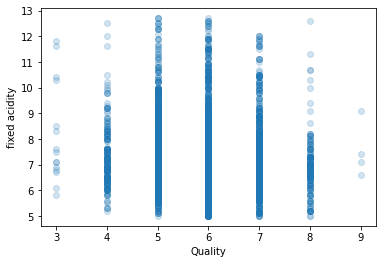

In [18]:
plt.scatter(data['quality'], data['fixed acidity'], alpha=0.2)
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
pass

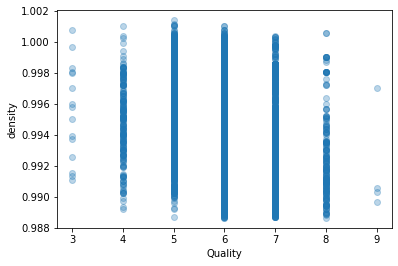

In [19]:
plt.scatter(data['quality'], data['density'], alpha=0.3)
plt.xlabel('Quality')
plt.ylabel('density')
pass

In [20]:
data = data.reset_index(drop=True)

In [21]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [22]:
data.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
6000,6.2,0.41,0.22,1.9,0.023,5.0,56.0,0.98928,3.04,0.79,13.0,7,white
6001,6.8,0.22,0.36,1.2,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,white
6002,6.1,0.34,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,white
6003,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white
6004,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white
6005,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6006,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6007,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6008,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6009,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


### Пропущенные значения

In [23]:
data.count()

fixed acidity           6010
volatile acidity        6010
citric acid             6010
residual sugar          6010
chlorides               6010
free sulfur dioxide     6010
total sulfur dioxide    6010
density                 6010
pH                      6010
sulphates               6010
alcohol                 6010
quality                 6010
Type                    6010
dtype: int64

Пропущенных значений нет.

### Задача классификации

Значения качества в нашей таблице: 

In [24]:
data['quality'].value_counts()

6    2644
5    1993
7     989
4     190
8     175
3      15
9       4
Name: quality, dtype: int64

В наших данных значения качества изменяются от 3 до 9, всего 7 классов.

In [25]:
data_raw['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

В дальнейшем можно сравнить результаты классификации на данных с выбросами и без. Возможно, мы могли удалить не ложные данные, а верные данные о классах с малым количеством примеров. 

## Визуализация и описательная статистика

Данные из себя представляют точки в 13 мерном пространстве. Выше рассматривали отдельные проекции, рассмотрим подробнее.

Данные о количественных признаках:

In [26]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.00000,6010.000000,6010.000000
mean,7.192304,0.335748,0.315502,5.418552,0.054342,30.356572,116.067304,0.994671,3.218995,0.52704,10.467870,5.822463
std,1.185059,0.155865,0.137695,4.590258,0.025697,16.554108,55.073220,0.002835,0.152886,0.13289,1.152919,0.857996
min,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988620,2.860000,0.28000,8.600000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.250000,0.992380,3.110000,0.43000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.51000,10.300000,6.000000
75%,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.60000,11.300000,6.000000
max,12.700000,0.965000,0.740000,19.400000,0.241000,86.000000,247.000000,1.001400,3.700000,1.12000,13.600000,9.000000


Для каждого количественного признака приведены 
* количество элементов в соответствующем столбце 
* средние значения
* стандартное отклонение (std)
* минимальное и макимальное значения
* медиана (квантиль $50\%$)
* значения нижнего и верхнего квартилей (квантили $25\%$ и $75\%$)

Среднее значение качества в нашей выборке - 5.8, больше 3/4 объектов имеют данную характеристику.

По умолчанию этот метод дает информацию только о количественных признаках (не включая номинальные).
Получим информацию о категориальных (нужно явно указать):

In [27]:
data.describe(include=['category'])

,Type
count,6010
unique,2
top,white
freq,4576


Для категориальных признаков информация другая:
* количество элементов в соответствующем столбце
* количество значений, которые принимает данный признак
* наиболее популярное значение
* количество объектов с самым популярным значением

В нашей выборке больше белого вина.

Изобразим графически количество различных значений у номинальных признаков:

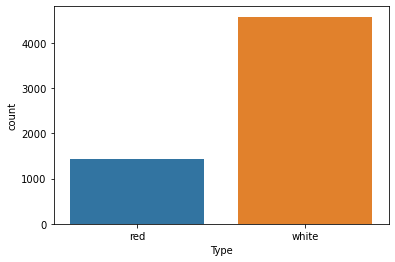

In [28]:
sns.countplot(x='Type', data=data)
pass

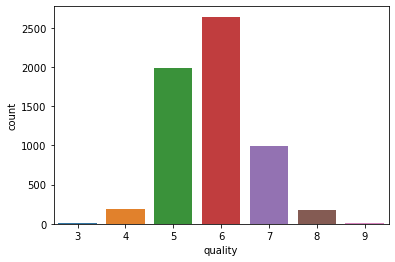

In [29]:
sns.countplot(x='quality', data=data)
pass

Большинство наших объектов среднего качества.

Построим все возможные диаграммы рассеивания для каждой пары переменных: (цвет отвечает за тип вина)

No handles with labels found to put in legend.


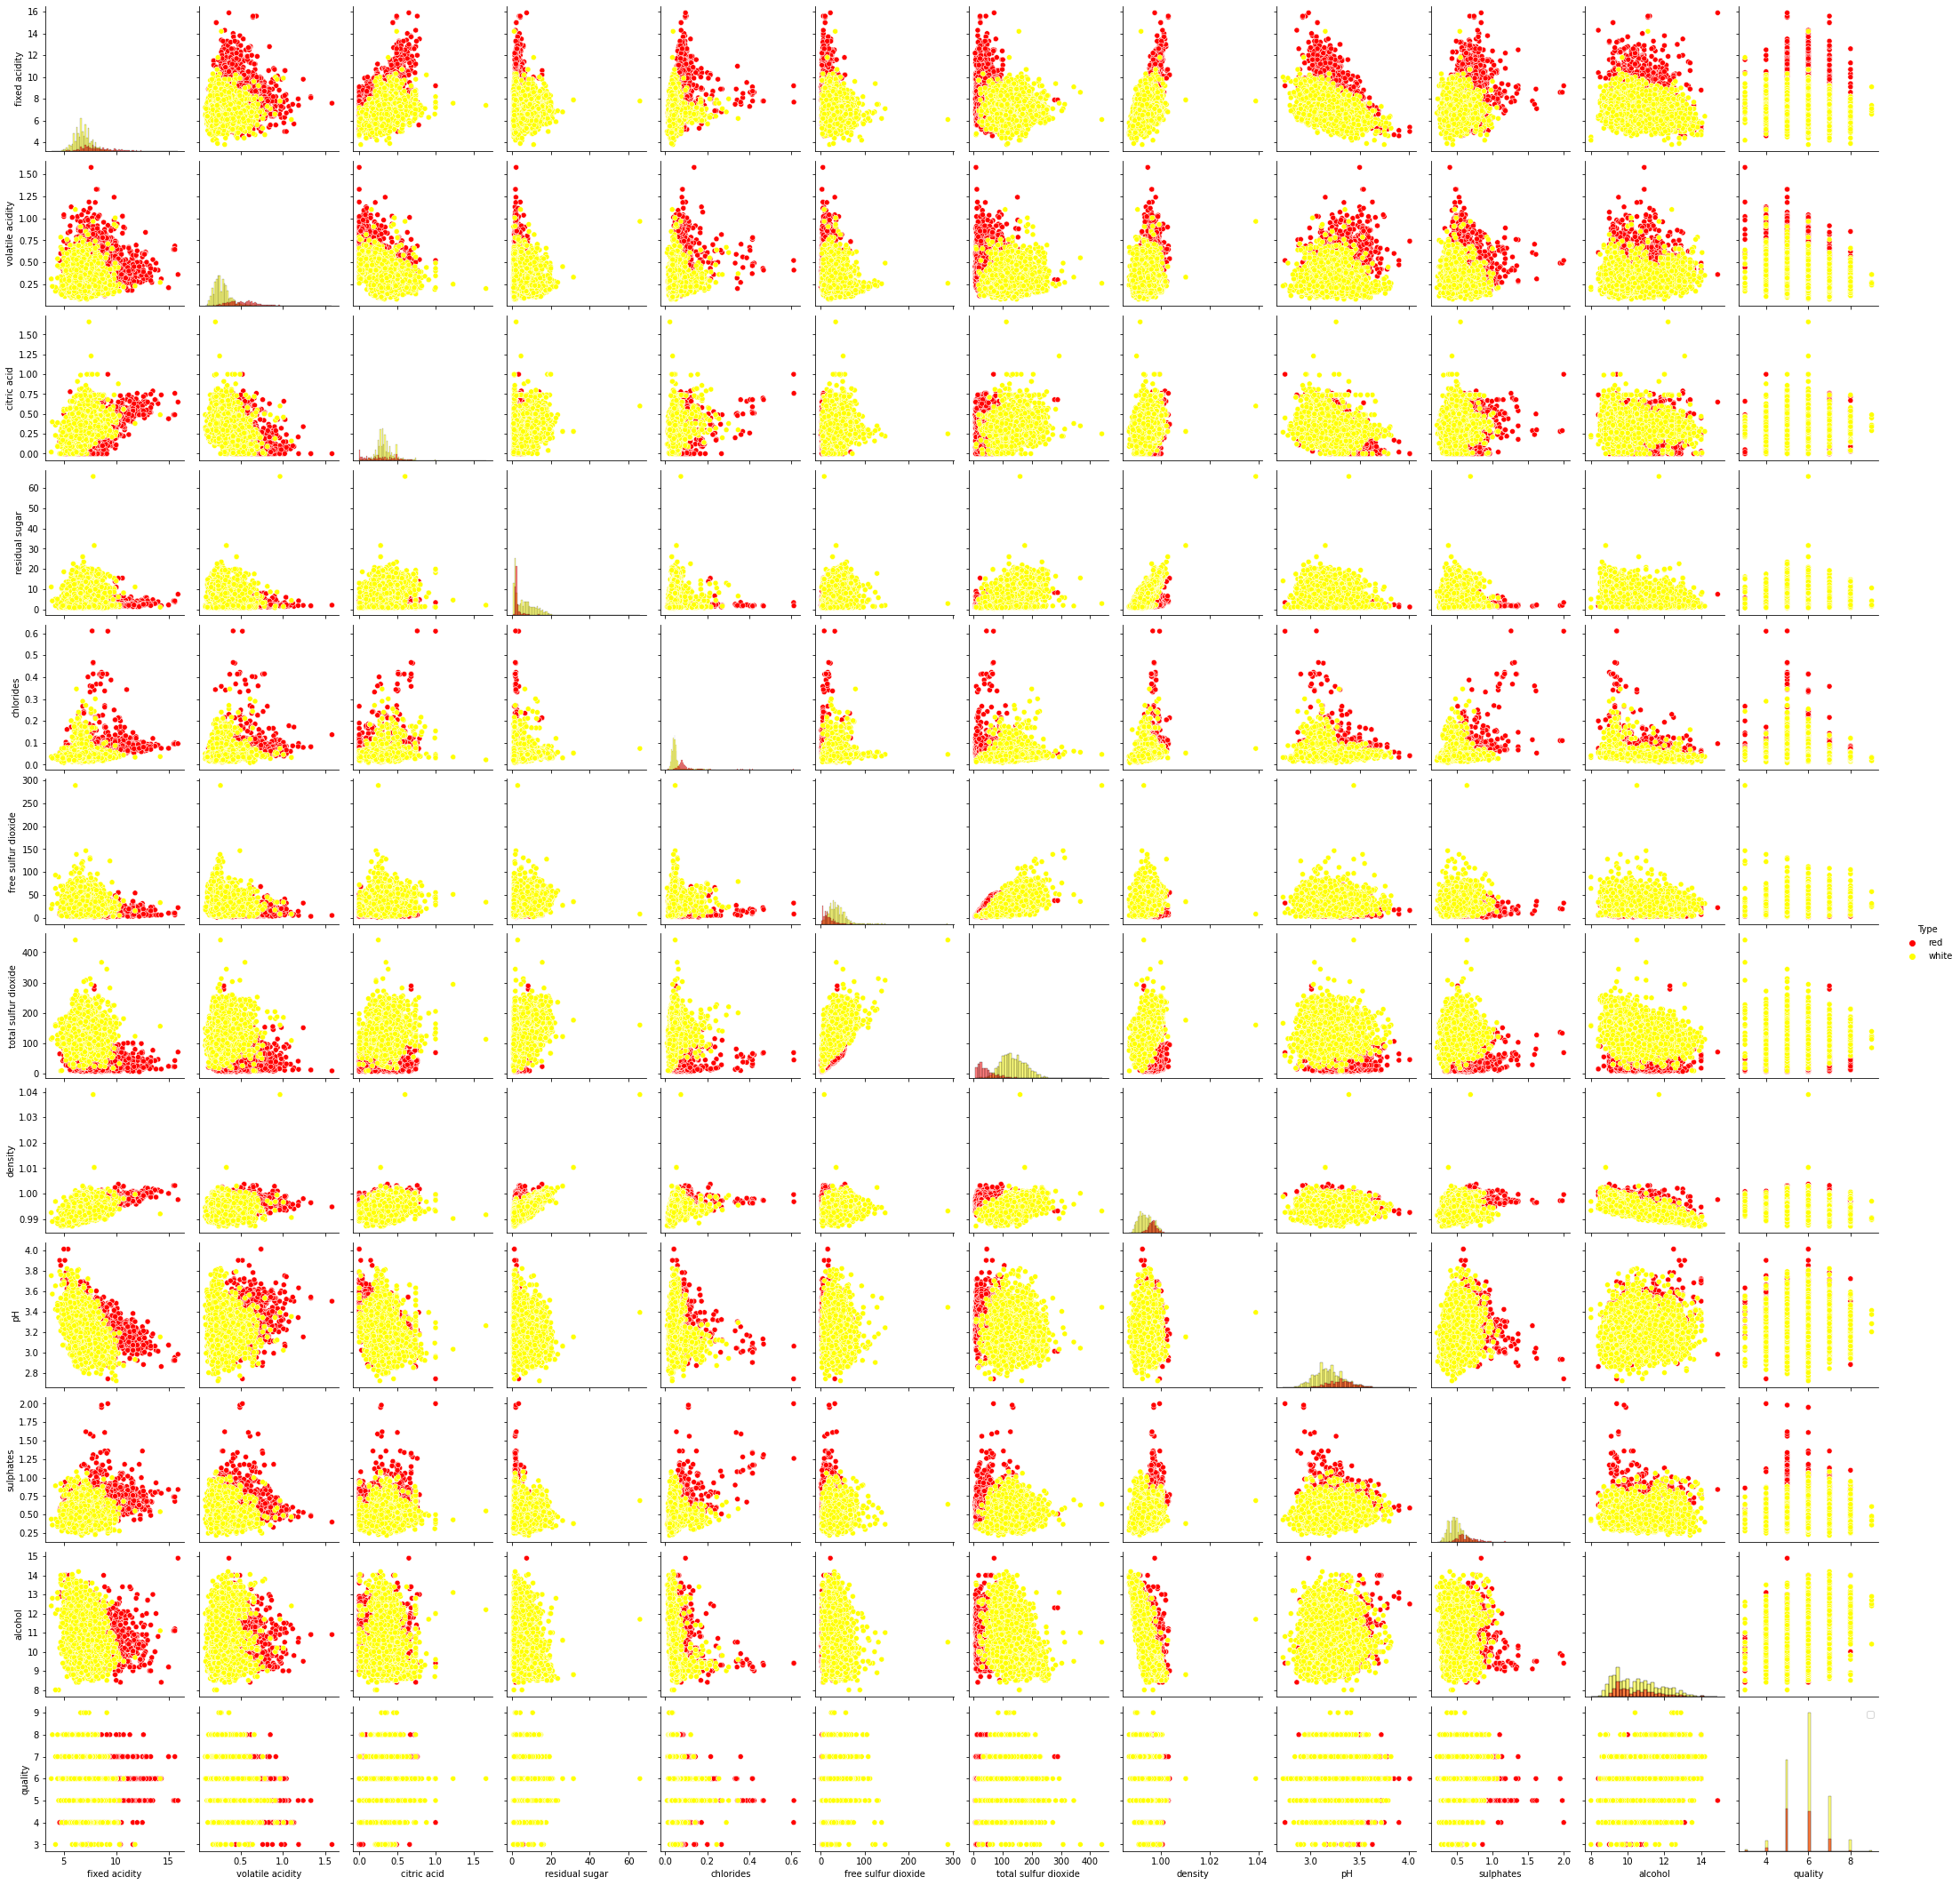

In [30]:
sns.pairplot(data_raw.iloc[:], hue='Type', palette=['red', 'yellow'], diag_kind='hist')
plt.legend()
pass

Можно заметить, что красные вина могут иметь значения признаков больше, чем белые вина. 

На диагонали расположены столбцовые гистограммы распределения признаков. Гистограммы можно построить отдельно.

/home/ksenia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


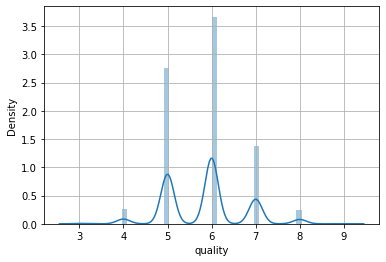

In [31]:
sns.distplot(data.loc[:,'quality'])
plt.grid()
pass

/home/ksenia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


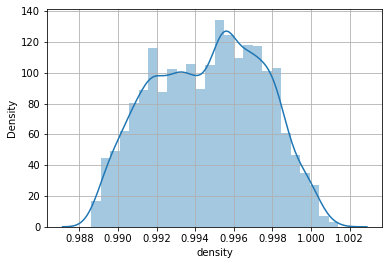

In [32]:
sns.distplot(data.loc[:,'density'])
plt.grid()
pass

/home/ksenia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


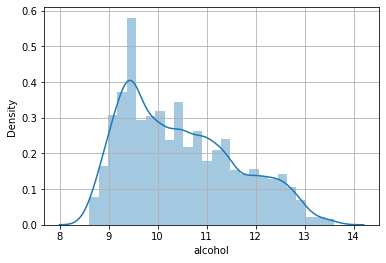

In [33]:
sns.distplot(data.loc[:,'alcohol'])
plt.grid()
pass 

/home/ksenia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


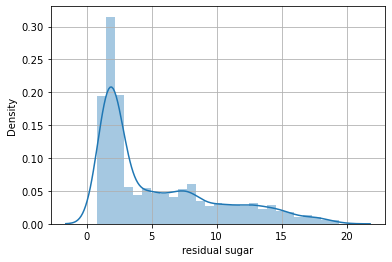

In [34]:
sns.distplot(data.loc[:,'residual sugar'])
plt.grid()
pass

Можно вычислить матрицу корреляции для количественных признаков.

Чем значение ближе к 1, тем корреляция между признаками больше. 

In [35]:
corr_mat = data.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.230330,0.292043,-0.134090,0.342927,-0.287852,-0.335232,0.438254,-0.211483,0.297736,-0.070290,-0.073089
volatile acidity,0.230330,1.000000,-0.416191,-0.213902,0.447979,-0.365642,-0.430705,0.281789,0.278050,0.226987,-0.053243,-0.255890
citric acid,0.292043,-0.416191,1.000000,0.137560,-0.069532,0.163849,0.219633,0.053594,-0.312299,0.026172,0.013974,0.091675
residual sugar,-0.134090,-0.213902,0.137560,1.000000,-0.155564,0.442671,0.508543,0.539010,-0.274545,-0.191596,-0.374549,-0.037328
chlorides,0.342927,0.447979,-0.069532,-0.155564,1.000000,-0.227897,-0.332395,0.438047,0.136703,0.301048,-0.286939,-0.218666
free sulfur dioxide,-0.287852,-0.365642,0.163849,0.442671,-0.227897,1.000000,0.726196,0.046565,-0.168992,-0.190465,-0.187355,0.077734
total sulfur dioxide,-0.335232,-0.430705,0.219633,0.508543,-0.332395,0.726196,1.000000,0.032766,-0.261137,-0.295511,-0.272013,-0.035367
density,0.438254,0.281789,0.053594,0.539010,0.438047,0.046565,0.032766,1.000000,0.049438,0.257343,-0.708656,-0.310798
pH,-0.211483,0.278050,-0.312299,-0.274545,0.136703,-0.168992,-0.261137,0.049438,1.000000,0.257317,0.094102,0.011846
sulphates,0.297736,0.226987,0.026172,-0.191596,0.301048,-0.190465,-0.295511,0.257343,0.257317,1.000000,0.023701,0.055713


Удобно использовать визуальный образ этой матрицы. Чем краснее ячейка, тем больше по абсолютной величине коэффициент корреляции:

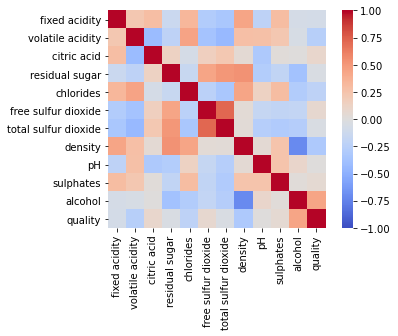

In [36]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Возможно из-за малого количества данных о качественном вине мы не можем получить большую информацию о зависимости качества вина от признаков.

In [37]:
corr_mat > 0.5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,True,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,True,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,True,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,False,True,True,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,True,True,False,False,False,False,False
total sulfur dioxide,False,False,False,True,False,True,True,False,False,False,False,False
density,False,False,False,True,False,False,False,True,False,False,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False


In [38]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

free sulfur dioxide  total sulfur dioxide    0.726196
residual sugar       density                 0.539010
                     total sulfur dioxide    0.508543
dtype: float64

Видим зависимость некоторых входных признаков.

Свободный диоксид серы связан с полным, что объяснимо.

Также остаточный сахар взаимосвязан с плотностью вина.

Относительно большие значения этих коэффициентов объяснимы и понятны.

## Бинаризация номинальных признаков

Некоторые алгоритмы из библиотеки scikit-learn не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых признаков.

Бинарный признак `'Type'` заменим на числовой. 

`'Red'` → 0, `'White'`→ 1 

Сделать это можно так:

In [39]:
data['Type'] = pd.factorize(data['Type'])[0]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6006,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6007,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6008,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


##  Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать (привести к одному масштабу).
Масштаб наших признаков не сильно отличается, но проведём нормализацию для улучшения работы алгоритма.

In [40]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,0.175262,2.336967,-2.291316,-0.766526,0.842828,-1.169291,-1.490149,1.103583,1.903417,0.248025,-0.926231,-0.958586,-1.786209
1,0.512798,3.491810,-2.291316,-0.614029,1.698955,-0.323580,-0.890947,0.750903,-0.124243,1.151027,-0.579286,-0.958586,-1.786209
2,0.512798,2.721915,-2.000819,-0.679385,1.465466,-0.927659,-1.126996,0.821439,0.268207,0.925276,-0.579286,-0.958586,-1.786209
3,3.381853,-0.357667,1.775647,-0.766526,0.803913,-0.806843,-1.018050,1.174119,-0.385877,0.398525,-0.579286,0.206921,-1.786209
4,0.175262,2.336967,-2.291316,-0.766526,0.842828,-1.169291,-1.490149,1.103583,1.903417,0.248025,-0.926231,-0.958586,-1.786209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,-0.837346,-0.806773,-0.185210,-0.831882,-0.597023,-0.383988,-0.437006,-1.245270,0.333615,-0.203476,0.635023,0.206921,0.559752
6006,-0.499810,-0.101035,0.323160,0.562375,-0.285704,1.609475,0.942975,0.080809,-0.451285,-0.504476,-0.752758,-0.958586,0.559752
6007,-0.584194,-0.614299,-0.911454,-0.919023,-0.519193,-0.021540,-0.092010,-0.751517,-1.497820,-0.504476,-0.926231,0.206921,0.559752
6008,-1.428034,-0.293509,-0.112586,-0.940808,-1.258576,-0.625619,-0.110168,-2.109338,0.791474,-1.106478,2.022805,1.372428,0.559752


## Разобьём данные на обучающую и тестовую выборки
Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [41]:
X = data_stand.drop(['quality'], axis=1)
y = data['quality']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4507, 1503)

## Обучаем классификатор ближайших соседей kNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

## Проверяем качество классификатора

In [44]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [45]:
y_train.shape

(4507,)

In [46]:
y_test != y_test_pred

5194    False
3979     True
5737     True
803     False
2584     True
        ...  
2233     True
5931     True
2901     True
673      True
5633     True
Name: quality, Length: 1503, dtype: bool

Ошибка:

In [47]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.3226092744619481, 0.4324683965402528)

Другие метрики:

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.36      0.10      0.16        48
           5       0.60      0.65      0.62       498
           6       0.58      0.64      0.61       661
           7       0.48      0.40      0.43       247
           8       0.36      0.11      0.17        44
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1503
   macro avg       0.34      0.27      0.29      1503
weighted avg       0.55      0.57      0.55      1503



/home/ksenia/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ksenia/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ksenia/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Значения метрик для бинарной классификации:

$$
\begin{array}{c|c|c|}
    &   f(x)=0 & f(x)=1 \\
\hline
y=0 & {\rm TN} & {\rm FP} \\
\hline
y=1 & {\rm FN} & {\rm TP} \\
\hline
\end{array}
$$

${\rm TN}$ – true negative

${\rm TP}$ – true positive

${\rm FP}$ – false positive, _ложные тревоги_ (ошибки 1-го рода или $\alpha$-ошибки)

${\rm FN}$ – false negative, _промахи_ (ошибки 2-го рода или $\beta$-ошибки)

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

$\alpha = {\rm FPR} = \frac{{\rm FP}}{{\rm TN}+{\rm FP}}$ – ``вероятность'' ошибки 1-го рода (_уровень значимости_)

$\beta = {\rm FNR} = \frac{{\rm FN}}{{\rm FN}+{\rm TP}}$ – ``вероятность'' ошибки 2-го рода

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ – ``точность'' (не путать с accuracy) 

${\rm recall} = {\rm TPR} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}} = 1 - {\rm FNR}$ – _чувствительность_, полнота, отклик (вероятность предсказать отсутствие болезни, при условии, что ее нет)

${\rm TNR} = \frac{{\rm TN}}{{\rm TN}+{\rm FP}} = 1 - {\rm FPR}$ – _специфичность_ (вероятность предсказать болезнь, при условии, что она есть)

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 





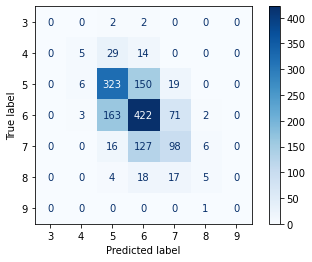

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

#### Вывод


Мы получили слишком большую ошибку. Скорее всего, это связано с несбалансированностью наших классов. 

Попробуем исправить ситуацию.

## Работа с несбалансированностью классов

Есть различные тактики для работы с несбалансированными классами. 

1. Самый лучший вариант - собрать больше данных. Но так как мы получили готовые данные, то не можем добавить новые примеры.


2. Попробуем увеличить количество примеров для различного качества вина путём объединения категорий в более общие.

### 1. Объединение в более общие группы.

Ещё раз посмотрим на количество примеров в нашей выборке для различного качества вина. 

In [50]:
data['quality'].value_counts()

6    2644
5    1993
7     989
4     190
8     175
3      15
9       4
Name: quality, dtype: int64

Можем заметить, что для вина плохого качества (3) и отличного качества (9) мы имеем значительно меньшее количество примеров, чем для вин среднего качества (~1000-2000). Попробуем для улучшения работы классификаторов объединить вина различного качества в общие категории. 

Введём для наших данных новый признак - категорию вина. 

 - 0-4 - вино неудовлетворительного качества;
 - 5-7 - вино среднего качества;
 - 8-10 - вино высокого качества.

In [51]:
condList = [
    data['quality']<=4,
    data['quality'] >=8,
]

choiceList = [0,2]

data_imbalance = data

data_imbalance['category'] = np.select(condList, choiceList, default=1)

In [52]:
data_imbalance

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
6006,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,1
6007,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
6008,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


Повторно нормализуем наши данные.

In [53]:
# Нормализация
data_stand = (data_imbalance - data_imbalance.mean(axis = 0))/data_imbalance.std(axis = 0)

Разделим на обучающую и тестовую выборки. Теперь в качестве выходного признака выберем категорию вина. Т.к. качество вина и его категория - это признаки, отвечающие за одни и те же характеристики, выбросим из выборки признак "quality".

In [54]:
X = data_stand.drop(['quality', 'category'], axis=1)
y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4507, 1503)

Воспользуемся классификатором на новых данных 

In [55]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

Проверим качество классификатора 

In [56]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [57]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.06012868870645662, 0.06520292747837658)

Получаем значительно меньшую ошибку.

### Confusion matrix

### Матрица рассогласования:

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[   1,   50,    0],
       [   2, 1399,    6],
       [   0,   40,    5]])

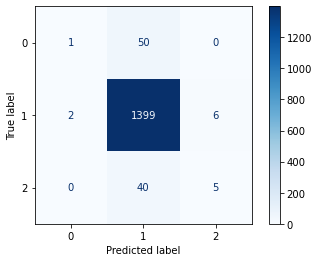

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

С таким изменением выходного признака ошибка уменьшилась. Но это случилось не из-за того, что классификатор стал лучше работать на этой выборке, а потому что теперь большая часть примеров находится в категории вин среднего качества. Можно предсказать, что 100% вин среднего качества - и ошибка всё ещё будет небольшой.

In [60]:
y_test.value_counts()

1    1407
0      51
2      45
Name: category, dtype: int64

Вина неудовлетворительного или высокого качества классификатор практически не смог предсказать. 

Значит, этот способ выдаёт нам меньшую ошибку, но он также неверный. 

Следовательно, нужно искать другие варианты. 

3. Попробуем дублировать примеры в классах с малым числом примеров. 

### 2. Добавление дубликатов

In [61]:
data_new = pd.concat([data,data.loc[data['quality'] == 9]])
data_new.loc[data['quality'] == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,category
2174,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1,2
2220,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1,2
2227,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1,2
2958,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1,2
2174,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1,2
2220,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1,2
2227,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1,2
2958,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1,2


In [62]:
data_new = pd.concat([data_new,data.loc[data['quality'] == 3]])
data_new.loc[data['quality'] == 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,category
401,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3,0,0
726,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3,0,0
1316,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,0,0
1341,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,0,0
1675,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.80,3,1,0
1677,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.70,3,1,0
1858,7.1,0.320,0.32,11.00,0.038,16.0,66.0,0.99370,3.24,0.40,11.50,3,1,0
2145,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.60,3,1,0
2267,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.60,3,1,0
2606,8.3,0.330,0.42,1.15,0.033,18.0,96.0,0.99110,3.20,0.32,12.40,3,1,0


In [63]:
#Перенумеруем наши примеры
data_new = data_new.reset_index(drop=True) # перенумеруем наши объекты
data_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,7.5,0.32,0.24,4.6,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3,1,0
6025,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3,1,0
6026,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3,1,0
6027,6.1,0.20,0.34,9.5,0.041,38.0,201.0,0.99500,3.14,0.44,10.1,3,1,0


In [64]:
# Нормализация
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

In [65]:
X = data_stand.drop(['quality', 'category'], axis=1)
y = data_new['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4521, 1508)

In [66]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [67]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.32890953328909533, 0.4204244031830239)

Значение ошибки на тестовой выборке уменьшилось, но незначительно.

Попробуем сделать это правильнее. 

Используем `imbalanced-learn`

### 3. Imbalanced-learn

Воспользуемся библиотекой `imbalanced learn`. Попробуем применить Naive random over-sampling. 

Из документации: 

One way to fight this issue is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.

As a result, the majority class does not take over the other classes during the training process. Consequently, all classes are represented by the decision function.


In [68]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [106]:
X = data_stand.drop(['quality', 'category'], axis=1)
y = data['quality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,0.175262,2.336967,-2.291316,-0.766526,0.842828,-1.169291,-1.490149,1.103583,1.903417,0.248025,-0.926231,-1.786209
1,0.512798,3.491810,-2.291316,-0.614029,1.698955,-0.323580,-0.890947,0.750903,-0.124243,1.151027,-0.579286,-1.786209
2,0.512798,2.721915,-2.000819,-0.679385,1.465466,-0.927659,-1.126996,0.821439,0.268207,0.925276,-0.579286,-1.786209
3,3.381853,-0.357667,1.775647,-0.766526,0.803913,-0.806843,-1.018050,1.174119,-0.385877,0.398525,-0.579286,-1.786209
4,0.175262,2.336967,-2.291316,-0.766526,0.842828,-1.169291,-1.490149,1.103583,1.903417,0.248025,-0.926231,-1.786209
...,...,...,...,...,...,...,...,...,...,...,...,...
6005,-0.837346,-0.806773,-0.185210,-0.831882,-0.597023,-0.383988,-0.437006,-1.245270,0.333615,-0.203476,0.635023,0.559752
6006,-0.499810,-0.101035,0.323160,0.562375,-0.285704,1.609475,0.942975,0.080809,-0.451285,-0.504476,-0.752758,0.559752
6007,-0.584194,-0.614299,-0.911454,-0.919023,-0.519193,-0.021540,-0.092010,-0.751517,-1.497820,-0.504476,-0.926231,0.559752
6008,-1.428034,-0.293509,-0.112586,-0.940808,-1.258576,-0.625619,-0.110168,-2.109338,0.791474,-1.106478,2.022805,0.559752


In [70]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,0.175262,2.336967,-2.291316,-0.766526,0.842828,-1.169291,-1.490149,1.103583,1.903417,0.248025,-0.926231,-1.786209
1,0.512798,3.491810,-2.291316,-0.614029,1.698955,-0.323580,-0.890947,0.750903,-0.124243,1.151027,-0.579286,-1.786209
2,0.512798,2.721915,-2.000819,-0.679385,1.465466,-0.927659,-1.126996,0.821439,0.268207,0.925276,-0.579286,-1.786209
3,3.381853,-0.357667,1.775647,-0.766526,0.803913,-0.806843,-1.018050,1.174119,-0.385877,0.398525,-0.579286,-1.786209
4,0.175262,2.336967,-2.291316,-0.766526,0.842828,-1.169291,-1.490149,1.103583,1.903417,0.248025,-0.926231,-1.786209
...,...,...,...,...,...,...,...,...,...,...,...,...
18503,0.175262,-0.614299,0.323160,-0.744741,-0.908342,-0.202764,0.416404,-1.453352,0.399024,-0.353976,1.762596,0.559752
18504,-0.499810,0.155596,-0.185210,-0.831882,-1.297491,-0.383988,-0.564109,-1.770764,1.249333,0.624276,1.675859,0.559752
18505,-0.077890,-0.485983,1.267277,-0.701170,-0.869427,0.038868,-0.055695,-1.541522,0.987700,-0.805477,2.109541,0.559752
18506,-0.499810,0.155596,-0.185210,-0.831882,-1.297491,-0.383988,-0.564109,-1.770764,1.249333,0.624276,1.675859,0.559752


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, stratify = y_resampled, random_state = 42)

In [72]:
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=7, p=1)

In [73]:
y_train_pred = model.predict(X_resampled)
y_test_pred = model.predict(X_test)

np.mean( y_resampled != y_train_pred), np.mean(y_test != y_test_pred)

(0.12065052950075643, 0.12189323535768316)

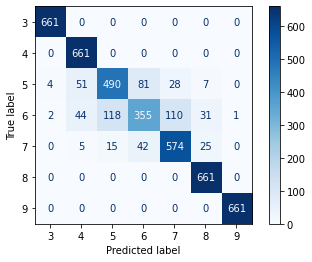

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

In [75]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       661
           4       0.87      1.00      0.93       661
           5       0.79      0.74      0.76       661
           6       0.74      0.54      0.62       661
           7       0.81      0.87      0.84       661
           8       0.91      1.00      0.95       661
           9       1.00      1.00      1.00       661

    accuracy                           0.88      4627
   macro avg       0.87      0.88      0.87      4627
weighted avg       0.87      0.88      0.87      4627



### Рассмотрим другие параметры классификатора

#### 7 соседей, евклидова метрика

In [76]:
model = KNeighborsClassifier(n_neighbors=7, p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [77]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [78]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.13875081046034146, 0.17657229306245947)

In [79]:
confusion_matrix(y_test, y_test_pred)

array([[661,   0,   0,   0,   0,   0,   0],
       [  0, 661,   0,   0,   0,   0,   0],
       [  4,  79, 410, 112,  40,  16,   0],
       [  4,  49, 158, 263, 142,  42,   3],
       [  0,  10,  28,  72, 493,  57,   1],
       [  0,   0,   0,   0,   0, 661,   0],
       [  0,   0,   0,   0,   0,   0, 661]])

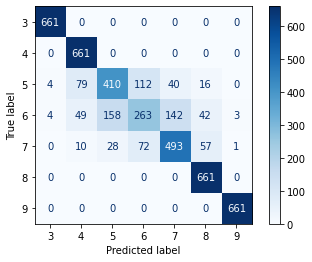

In [80]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

Стало хуже.

#### 1 сосед, манхеттоновское расстояние


In [81]:
model = KNeighborsClassifier(n_neighbors=1, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [82]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

При одном соседе на обучающей выборке мы точно получим ошибку 0:

In [83]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.08882645342554571)

Есть объект, его нужно проклассифицировать, метод ищет в обучающей выборке самый близкий объект. Т.к. объект был из обучающей выборки, то сам объект и будет самым близким соседом. Поэтому для него самого метка будет точно правильной.

In [84]:
confusion_matrix(y_test, y_test_pred)

array([[661,   0,   0,   0,   0,   0,   0],
       [  0, 661,   0,   0,   0,   0,   0],
       [  0,  14, 538,  92,  13,   4,   0],
       [  1,  15, 126, 428,  75,  16,   0],
       [  0,   0,  14,  36, 606,   5,   0],
       [  0,   0,   0,   0,   0, 661,   0],
       [  0,   0,   0,   0,   0,   0, 661]])

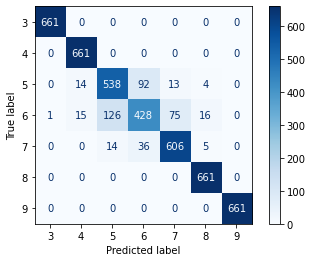

In [85]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

Стало лучше. 

#### 12 соседей, манхеттоновское расстояние

In [86]:
model = KNeighborsClassifier(n_neighbors=12, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

In [87]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [88]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.18269577119804048, 0.21850010806137887)

In [89]:
confusion_matrix(y_test, y_test_pred)

array([[661,   0,   0,   0,   0,   0,   0],
       [  0, 655,   6,   0,   0,   0,   0],
       [  7, 123, 362,  90,  56,  23,   0],
       [  3,  69, 162, 208, 142,  75,   2],
       [  0,  26,  23,  97, 421,  94,   0],
       [  0,   0,   0,   4,   9, 648,   0],
       [  0,   0,   0,   0,   0,   0, 661]])

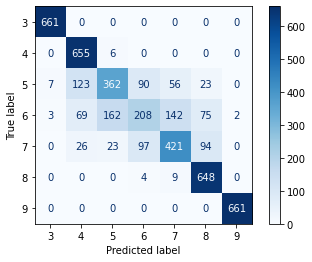

In [90]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

Опять стало хуже.

### Оптимальное количество соседей для kNN классификатора.

Можно использовать различные метрики: 


*Евклидово расстояние* ($\ell_2$-метрика):
$$
\rho_2(x,x') = \sqrt{\sum_{j=1}^d (x_j - x_j')^2}
$$

*Манхеттеновское расстояние* ($\ell_1$-метрика):
$$
\rho_1(x,x') = \sum_{j=1}^d |x_j - x_j'|
$$


*Чебышевское расстояние* ($\ell_{\infty}$-метрика):
$$
\rho_{\infty}(x,x') = \max_{j=1,\dots,d} |x_j - x_j'|
$$

Приведенные выше метрики являются частным случаем *расстояния Минковского*:
$$
\rho_p(x,x') = \left(\sum_{j=1}^d |x_j - x_j'|^p\right)^{1/p} \qquad (p\ge 1)
$$


#### 1. Манхеттеновское расстояние

In [91]:
kk = range(1, 30, 2)
err_train = []
err_test = []
for k in kk:
    model = KNeighborsClassifier(n_neighbors = k, p=1)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

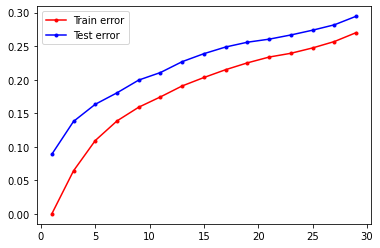

In [92]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
#plt.gca().set_xscale('log')

In [93]:
min(err_test), kk[err_test.index(min(err_test))]

(0.08882645342554571, 1)

#### 2. Евклидово расстояние

In [94]:
kk = range(1, 30, 2)
err_train = []
err_test = []
for k in kk:
    model = KNeighborsClassifier(n_neighbors = k, p=2)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

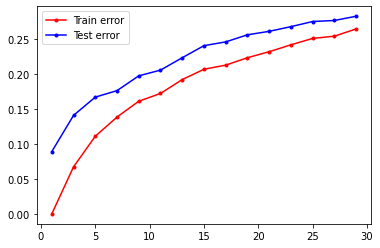

In [95]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

In [96]:
min(err_test), kk[err_test.index(min(err_test))]

(0.08925869894099848, 1)

Наименьшее значение ошибок получается с одним соседом. 

### Случайный лес 

In [97]:
from sklearn import ensemble # ансамбль
rf_model = ensemble.RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [99]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.0739139831424249)

In [100]:
confusion_matrix(y_test, y_test_pred)

array([[661,   0,   0,   0,   0,   0,   0],
       [  0, 661,   0,   0,   0,   0,   0],
       [  0,   6, 556,  92,   7,   0,   0],
       [  0,   0, 122, 470,  68,   1,   0],
       [  0,   0,   4,  42, 615,   0,   0],
       [  0,   0,   0,   0,   0, 661,   0],
       [  0,   0,   0,   0,   0,   0, 661]])

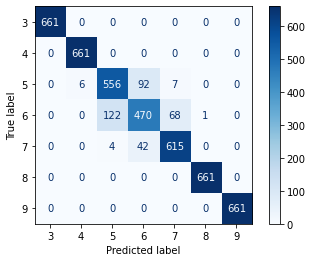

In [101]:
plot_confusion_matrix(rf_model, X_test, y_test, cmap=plt.cm.Blues)
pass

Минимальную ошибку получим при классификации с помощью Random Forest.

In [102]:
kk = range(1, 150, 10)
err_train = []
err_test = []
for k in kk:
    rf_model = ensemble.RandomForestClassifier(n_estimators = k)
    rf_model.fit(X_train, y_train)
    err_train.append(np.mean(rf_model.predict(X_train) != y_train))
    err_test.append(np.mean(rf_model.predict(X_test) != y_test))

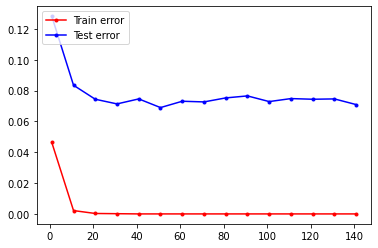

In [103]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

In [104]:
min(err_test), kk[err_test.index(min(err_test))]

(0.06894315971471796, 51)

Оптимальное значение - 51. 

# ДЗ 4


# Обучим на этих данных полносвязную (неглубокую) нейронную сеть

Полносвязная нейронная сеть = MLP - Multi Layer Perceptron

.

.

.

Попробуйте 1-2 скрытых слоя. 

Постройте графики зависимости ошибки на обучающей выборке и тестовой выборках от параметра alpha и от количества нейронов. 

Наблюдается ли переобучение/недообучение? 

По желанию: можете использовать torch и сверточные сети Сделайте выводы.

Импортируем классификатор

In [107]:
from sklearn.neural_network import MLPClassifier

Вызываем конструктор для одного слоя из 30 нейронов

По старой терминологии - трехслойная полносвязная нейронная сеть

In [108]:
mlp_model = MLPClassifier(hidden_layer_sizes = (30,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                           max_iter=1500)

In [109]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30,), max_iter=1500,
              random_state=42)

Проверяем ошибки

In [110]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках

In [111]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.23067502341329876 0.250270153447158


Можно по-другому

In [112]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.7693249765867013 0.749729846552842


In [128]:
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.23024277789784597 0.250270153447158


Или так

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_train, y_train_pred)

0.7693249765867013

In [116]:
accuracy_score(y_test, y_test_pred)

0.749729846552842

## Подбор гиперпараметров
Можно подбирать и количество слоёв, и количество нейронов. 

Подберем оптимальное значение параметра регуляризации `alpha`

(Можно вместо циклов, написанных руками, использовать `sklearn.model_selection.GridSearchCV` и т.п.)

### 1. Подбор оптимального параметра регуляризации

In [117]:
alpha_arr = np.logspace(-7, 5, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (30,), 
                              solver = 'adam', activation = 'logistic', max_iter=1500, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

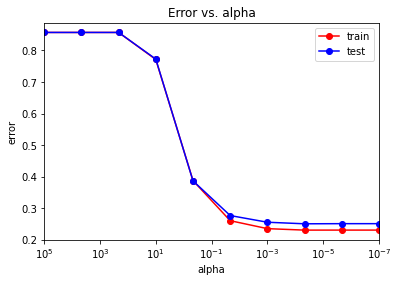

In [118]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

##### Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

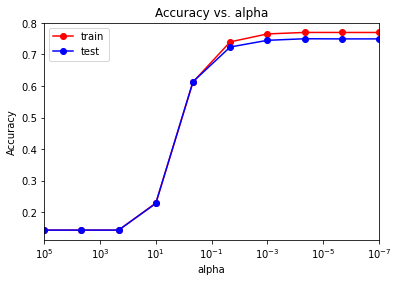

In [119]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

##### Минимальное значение ошибки:

In [120]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.23024277789784597 0.250270153447158


Оптимальное значение `alpha`:

In [121]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[4.64158883e-05]


In [122]:
alpha_opt = alpha_opt[0]

## Классификатор при найденном *оптимальном* значении `alpha`:

In [123]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (30,),
                          solver = 'adam', activation = 'logistic', random_state = 42, max_iter=1500)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.23024277789784597
0.250270153447158


### Матрица рассогласования:

In [124]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[661   0   3   1   1   0   0]
 [  0 568 100  60  20   6   0]
 [  0  53 367 162  33   0   0]
 [  0  24 135 240 137  16   0]
 [  0  13  44 141 377  44   0]
 [  0   3  12  56  93 595   0]
 [  0   0   0   1   0   0 661]]


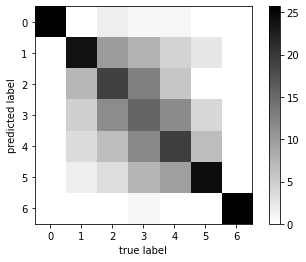

In [125]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(7))
plt.yticks(range(7))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

#### Кроме того, вы можете воспользоваться встроенной в Sklearn функцией, которая сама считает и отрисовывает Confusion matrix

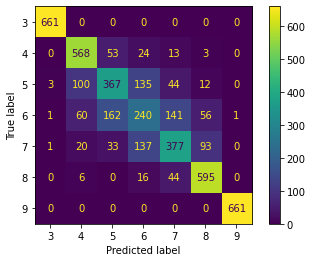

In [126]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test) 

### Другие метрики качества:

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       661
           4       0.75      0.86      0.80       661
           5       0.60      0.56      0.58       661
           6       0.43      0.36      0.40       661
           7       0.61      0.57      0.59       661
           8       0.78      0.90      0.84       661
           9       1.00      1.00      1.00       661

    accuracy                           0.75      4627
   macro avg       0.74      0.75      0.74      4627
weighted avg       0.74      0.75      0.74      4627



### 2. Подбор оптимального числа нейронов

In [129]:
neuron_arr = np.linspace(10, 500, 10).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for count in neuron_arr:
  mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(count,), max_iter=1000, random_state=63)
  mlp_model.fit(X_train, y_train)
  
  y_train_pred = mlp_model.predict(X_train)
  y_test_pred = mlp_model.predict(X_test)
  
  test_error.append(np.mean(y_test != y_test_pred))
  train_error.append(np.mean(y_train != y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))
  train_acc.append(accuracy_score(y_train, y_train_pred))

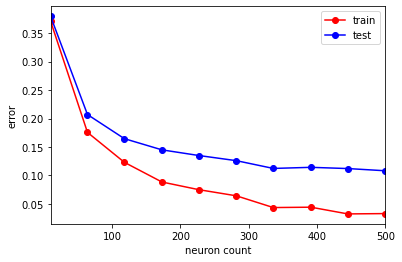

In [130]:
plt.plot(neuron_arr, train_error, 'r-o', label='train')
plt.plot(neuron_arr, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

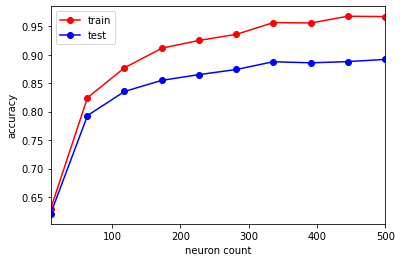

In [131]:
plt.plot(neuron_arr, train_acc, 'r-o', label='train')
plt.plot(neuron_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.xlabel('neuron count')
plt.ylabel('accuracy')
plt.legend()

Минимальное значение ошибки:

In [132]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print(min_train_error, min_test_error)

0.03249045457820042 0.10827750162092069


In [133]:
neuron_opt = neuron_arr[test_error == min_test_error]
print(neuron_opt)

[500]


Классификатор при оптимальном значении параметра регуляризации и числа нейронов

In [134]:
neuron_opt = neuron_opt[0]
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,), random_state = 63)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.08140623874360636
0.1361573373676248


/home/ksenia/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [135]:
accuracy_score(y_train, y_train_pred)

0.9185937612563936

In [136]:
accuracy_score(y_test, y_test_pred)

0.8638426626323752